In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import numpy as np
from learnMSA import msa_hmm
from matplotlib import pyplot as plt

## MSA HMM Interactive

1. Fit n models, keep the best and align
2. Compare to a reference
3. Visualize the HMM

Change the variables in the following cell to fit your needs.

In [2]:
# your fasta file with unaligned sequences
train_filename = "../MSA-HMM-Analysis/data/homfam/train/egf.fasta"

# reference file with aligned sequences that have matching IDs to seqs in the train_file
# replace with empty string if no reference is available
ref_filename = "../MSA-HMM-Analysis/data/homfam/refs/egf.ref"

# number of independently trained models
num_models = 5

## Training

In [3]:
def print_and_plot(alignment, 
                   max_seq = 20, 
                   seqs_to_plot = [0,1,2], 
                   seq_ids = False, 
                   plot_model=True, 
                   plot_anc_probs=True,
                   plot_logo=True):
    # print the alignment
    msa = alignment.to_string(alignment.best_model)
    i = [l.name for l in alignment.encoder_model.layers].index("AncProbsLayer")
    anc_probs_layer = alignment.encoder_model.layers[i]
    ds = msa_hmm.train.make_dataset(alignment.indices, 
                            alignment.batch_generator,
                            alignment.batch_size, 
                            shuffle=False)
    ll = alignment.model.predict(ds)[alignment.best_model] + alignment.prior[alignment.best_model]
    for i,s in enumerate(msa[:max_seq]):
        indices = np.array([[alignment.indices[i]]]*alignment.msa_hmm_layer.cell.num_models)
        tau = anc_probs_layer.make_tau(indices)[alignment.best_model]
        param_string = "l=%.2f" % (ll[i]) + "_t=%.2f" % tau
        if seq_ids:
            print(f">{alignment.fasta_file.seq_ids[i]} "+param_string)
        else:
            print(">"+param_string)
        print(s)
    if len(msa) > max_seq:
        print(len(msa) - max_seq, "sequences omitted.")
    if plot_model:
        #plot the model
        fig = plt.figure(frameon=False)
        ax = fig.add_axes([0, 0, 1, 1])
        msa_hmm.vis.plot_hmm(alignment, alignment.best_model, ax, 
                 seq_indices=alignment.indices[seqs_to_plot],
                 path_colors=["#CC6600", "#0000cc", "#00cccc"])   
    if plot_anc_probs:
        msa_hmm.vis.plot_anc_probs(best_alignment, alignment.best_model, seqs=seqs_to_plot)
    if plot_logo:
        fig, ax = plt.subplots()
        msa_hmm.vis.make_logo(best_alignment, alignment.best_model, ax)

Training of 5  models on file egf.fasta
Configuration:
num_models : 5 , transitioner : ProfileHMMTransitioner(transition_init=ListWrapper([DictWrapper({'begin_to_match': <learnMSA.msa_hmm.Initializers.EntryInitializer object at 0x7fa6084c00a0>, 'match_to_end': <learnMSA.msa_hmm.Initializers.ExitInitializer object at 0x7fa5d0f25220>, 'match_to_match': <learnMSA.msa_hmm.Initializers.MatchTransitionInitializer object at 0x7fa5d0d42d00>, 'match_to_insert': <learnMSA.msa_hmm.Initializers.MatchTransitionInitializer object at 0x7fa5d0d42d30>, 'insert_to_match': <tensorflow.python.ops.init_ops_v2.Constant object at 0x7fa5d0d425e0>, 'insert_to_insert': <tensorflow.python.ops.init_ops_v2.Constant object at 0x7fa5d0d42df0>, 'match_to_delete': <learnMSA.msa_hmm.Initializers.MatchTransitionInitializer object at 0x7fa5d0d42040>, 'delete_to_match': <tensorflow.python.ops.init_ops_v2.Constant object at 0x7fa5d0d42610>, 'delete_to_delete': <tensorflow.python.ops.init_ops_v2.Constant object at 0x7fa5d0d

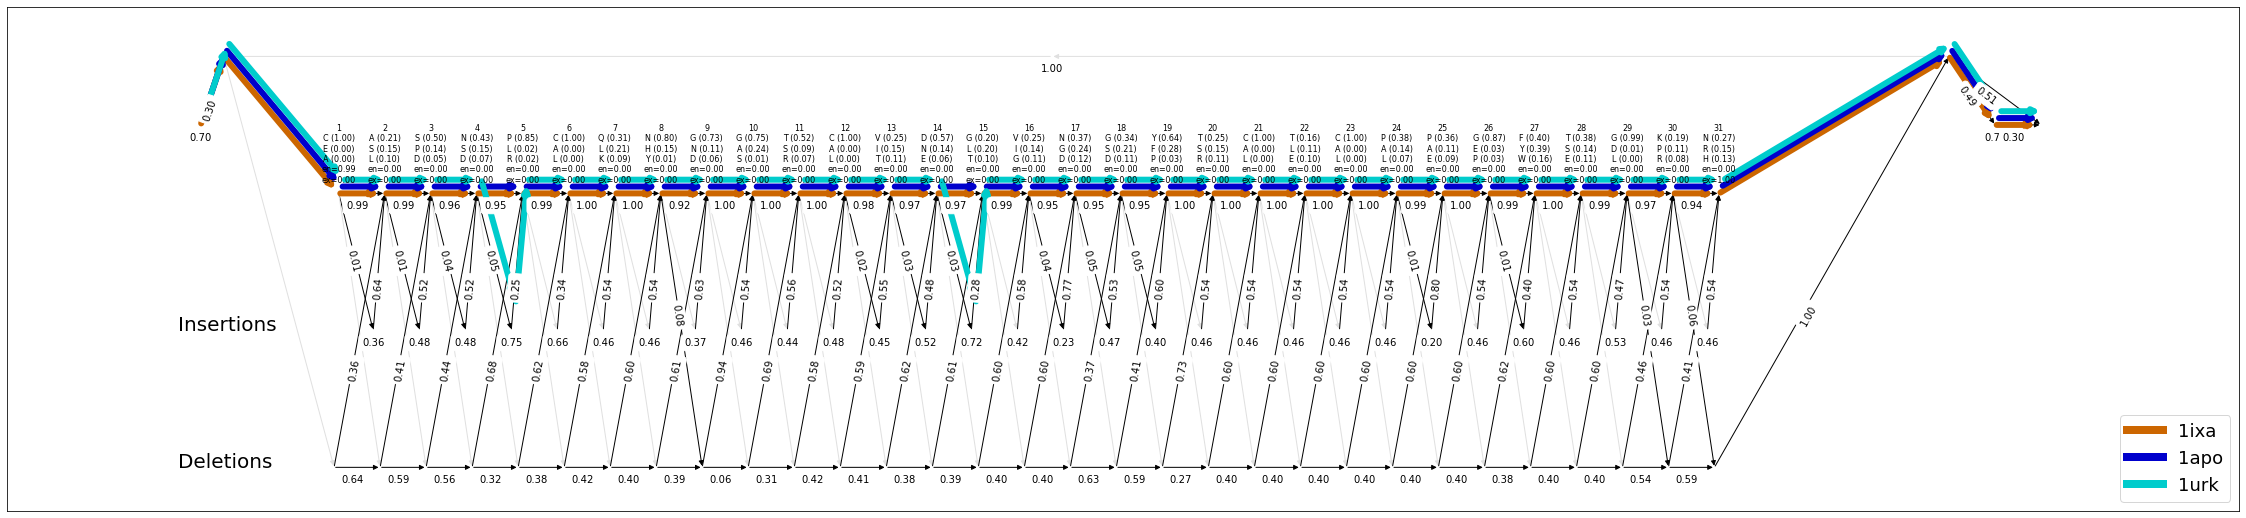

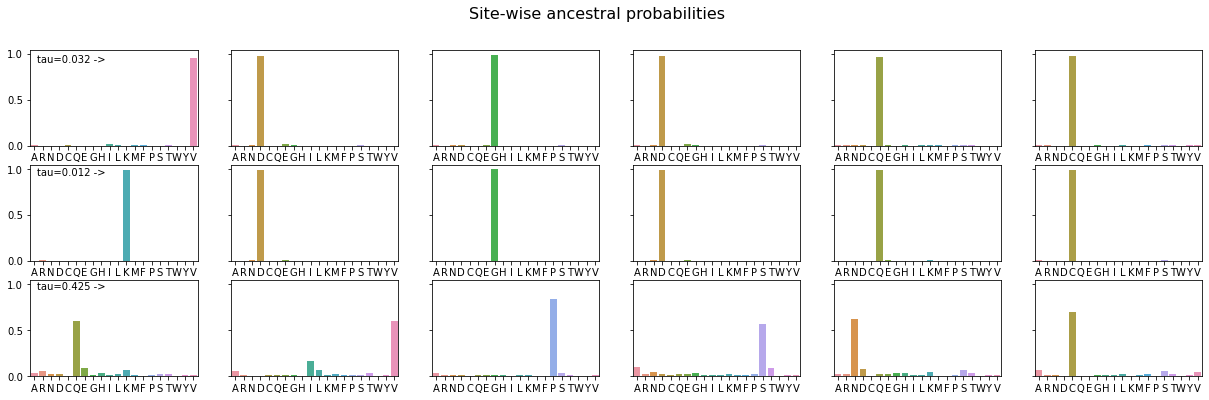

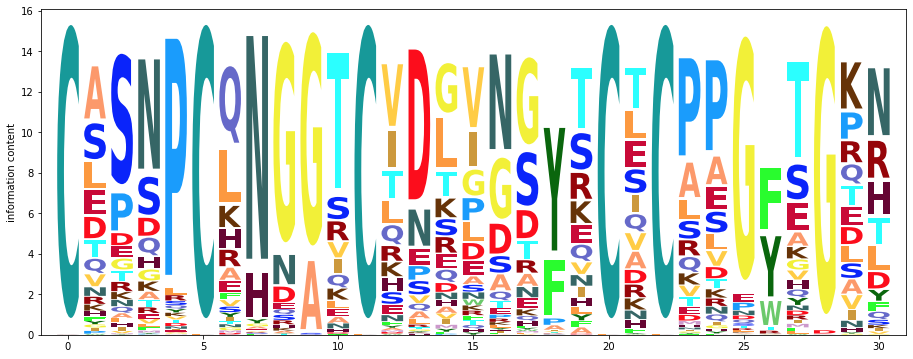

In [4]:
out_filename = "test/data/interactive.alignment.fasta"
config = msa_hmm.config.make_default(num_models)
best_alignment, r = msa_hmm.align.run_learnMSA(train_filename,
                                              out_filename,
                                              config, 
                                              ref_filename=ref_filename, 
                                              verbose=True)
print_and_plot(best_alignment)